In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("C:\\Users\\sanut\\Downloads\\Employee.csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [3]:
df.info

<bound method DataFrame.info of      Company   Age  Salary     Place Country  Gender
0        TCS  20.0     NaN   Chennai   India       0
1    Infosys  30.0     NaN    Mumbai   India       0
2        TCS  35.0  2300.0  Calcutta   India       0
3    Infosys  40.0  3000.0     Delhi   India       0
4        TCS  23.0  4000.0    Mumbai   India       0
..       ...   ...     ...       ...     ...     ...
143      TCS  33.0  9024.0  Calcutta   India       1
144  Infosys  22.0  8787.0  Calcutta   India       1
145  Infosys  44.0  4034.0     Delhi   India       1
146      TCS  33.0  5034.0    Mumbai   India       1
147  Infosys  22.0  8202.0    Cochin   India       0

[148 rows x 6 columns]>

In [16]:
## Unique values in each features and length
for column in df:
    print(column)
    column = df[column].unique()
    print(len(column))

Company
7
Age
30
Salary
41
Place
12
Country
1
Gender
2


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,130.0,30.484615,11.096640,0.0,22.0,32.5,37.75,54.0
Salary,124.0,5312.467742,2573.764683,1089.0,3030.0,5000.0,8000.00,9876.0
Gender,148.0,0.222973,0.417654,0.0,0.0,0.0,0.00,1.0


In [8]:
df.describe(include = 'object')

,Company,Place,Country
count,140,134,148
unique,6,11,1
top,TCS,Mumbai,India
freq,53,37,148


In [26]:
## Number od rows and columns & sisze of data
number_of_rows = df.shape[0]
number_of_columns = df.shape[1]
print('Total number of rows :',number_of_rows)
print('Total number of columns :',number_of_columns)
total_data = number_of_rows * number_of_columns
print('Total number pf data :',total_data)

Total number of rows : 148
Total number of columns : 6
Total number pf data : 888


In [26]:
## Total number of missing value in each columns
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [29]:
## Replacing the missing values
df['Company'].fillna(df['Company'].mode(),inplace = True)
df['Age'].fillna(df['Age'].mean(),inplace = True)
df['Salary'].fillna(df['Salary'].median(),inplace = True)
df['Place'].fillna(df['Place'].mode(),inplace = True)

In [29]:
## Finding duplicate values
df.duplicated().sum()

4

In [30]:
## Removing duplicate values
df.drop_duplicates(inplace = True)

<Axes: >

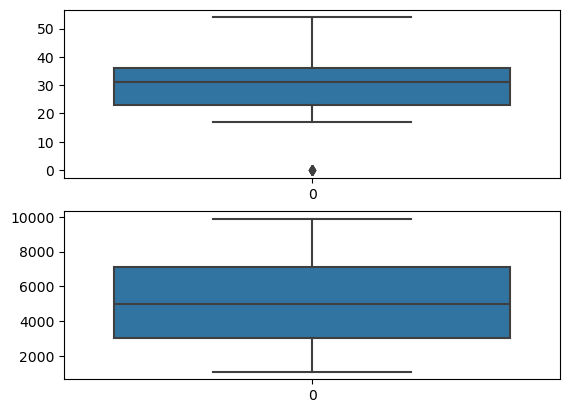

In [43]:
## Identifying outliers
plt.subplot(2,1,1)
sns.boxplot(df['Age'])
plt.subplot(2,1,2)
sns.boxplot(df['Salary'])

In [47]:
## Capping the outlier in the Age feature
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3-q1
iqr

13.0

In [49]:
# Lower & Upper wisker
upper_wisker = q3+1.5*iqr
lower_wisker = q1-1.5*iqr
print('upper wisker',upper_wisker)
print('lower wisker',lower_wisker)

upper wisker 55.5
lower wisker 3.5


In [51]:
## Capping
df1 = df.copy()
df1.loc[df1['Age']<lower_wisker,'Age'] = lower_wisker
df1.loc[df1['Age']>upper_wisker,'Age'] = upper_wisker

<Axes: >

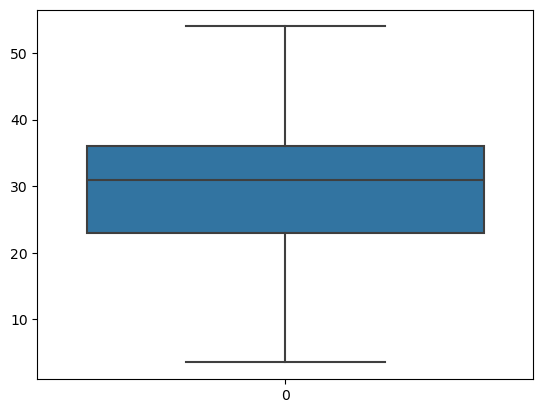

In [52]:
sns.boxplot(df1['Age'])

In [5]:
## Replacing the value 0 in Age with Nan
df['Age'].replace(0,'NaN')

0      20.0
1      30.0
2      35.0
3      40.0
4      23.0
       ... 
143    33.0
144    22.0
145    44.0
146    33.0
147    22.0
Name: Age, Length: 148, dtype: object

In [6]:
## filtering data with age > 40 and salary < 5000
df.loc[(df['Age'] > 40) &(df['Salary'] < 5000)]

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


In [25]:
## Count of people from each places
count = df['Place'].value_counts()
count

Place
Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

<Axes: xlabel='Place', ylabel='count'>

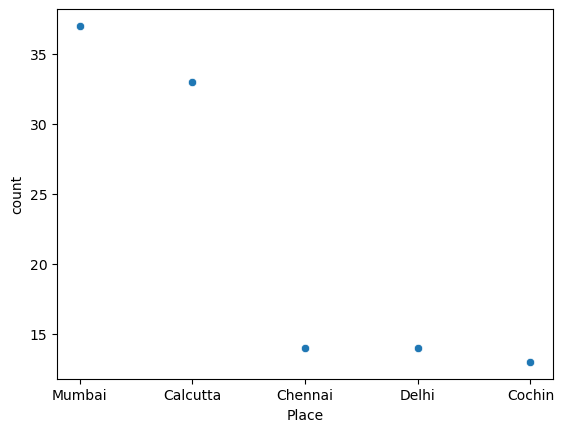

In [37]:
## Visualizing the top 5 places with most employees
sns.scatterplot(count.head(5))

In [38]:
## Displaying row wisw details with index number start with 1
# i = index, i+1 is index statr with 1
for i,rows in df.iterrows():
    print(i+1,rows)

1 Company        TCS
Age           20.0
Salary         NaN
Place      Chennai
Country      India
Gender           0
Name: 0, dtype: object
2 Company    Infosys
Age           30.0
Salary         NaN
Place       Mumbai
Country      India
Gender           0
Name: 1, dtype: object
3 Company         TCS
Age            35.0
Salary       2300.0
Place      Calcutta
Country       India
Gender            0
Name: 2, dtype: object
4 Company    Infosys
Age           40.0
Salary      3000.0
Place        Delhi
Country      India
Gender           0
Name: 3, dtype: object
5 Company       TCS
Age          23.0
Salary     4000.0
Place      Mumbai
Country     India
Gender          0
Name: 4, dtype: object
6 Company     Infosys
Age             NaN
Salary       5000.0
Place      Calcutta
Country       India
Gender            0
Name: 5, dtype: object
7 Company        TCS
Age            NaN
Salary      6000.0
Place      Chennai
Country      India
Gender           1
Name: 6, dtype: object
8 Company    Infosys


In [55]:
## One Hot Encoding
pd.get_dummies(data = df,columns = ['Company','Country','Place'])

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Country_India,...,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,20.0,NaN,0,False,False,False,False,True,False,True,...,False,True,False,False,False,False,False,False,False,False
1,30.0,NaN,0,False,False,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.0,0,False,False,False,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.0,0,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.0,0,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,33.0,9024.0,1,False,False,False,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
144,22.0,8787.0,1,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
145,44.0,4034.0,1,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
146,33.0,5034.0,1,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False


In [57]:
##  Converting categorical values into numerical values using  Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in df:
    df[i] = label_encoder.fit_transform(df[i])
    print(df[i])

0      4
1      2
2      4
3      2
4      4
      ..
143    4
144    2
145    2
146    4
147    2
Name: Company, Length: 148, dtype: int32
0       4
1      11
2      16
3      20
4       7
       ..
143    14
144     6
145    23
146    14
147     6
Name: Age, Length: 148, dtype: int64
0      40
1      40
2       3
3       5
4      12
       ..
143    37
144    34
145    13
146    19
147    32
Name: Salary, Length: 148, dtype: int64
0      2
1      6
2      1
3      4
4      6
      ..
143    1
144    1
145    4
146    6
147    3
Name: Place, Length: 148, dtype: int32
0      0
1      0
2      0
3      0
4      0
      ..
143    0
144    0
145    0
146    0
147    0
Name: Country, Length: 148, dtype: int32
0      0
1      0
2      0
3      0
4      0
      ..
143    1
144    1
145    1
146    1
147    0
Name: Gender, Length: 148, dtype: int64


In [58]:
## Feature sacaling using Standard scaler and Minmax scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Standard Scaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
print(scaled_data)

[[ 0.84843616 -1.25846717  1.28537302 -0.85254229  0.         -0.53568323]
 [-0.27271162 -0.4476637   1.28537302  0.42843496  0.         -0.53568323]
 [ 0.84843616  0.13148165 -1.38383542 -1.1727866   0.         -0.53568323]
 [-0.27271162  0.59479792 -1.23955388 -0.21205367  0.         -0.53568323]
 [ 0.84843616 -0.91097997 -0.7345685   0.42843496  0.         -0.53568323]
 [-0.27271162  1.63725953 -0.37386466 -1.1727866   0.         -0.53568323]
 [ 0.84843616  1.63725953  0.20326149 -0.85254229  0.          1.86677489]
 [-0.27271162 -0.91097997  0.4196838   0.42843496  0.          1.86677489]
 [ 0.84843616  0.01565258  0.6361061  -1.1727866   0.          1.86677489]
 [-1.3938594   1.05811419  0.99680994 -0.21205367  0.         -0.53568323]
 [-1.3938594  -0.91097997  1.28537302  0.42843496  0.         -0.53568323]
 [-1.3938594   0.01565258 -1.60025773 -1.1727866   0.         -0.53568323]
 [-1.3938594   1.05811419  1.28537302 -0.85254229  0.         -0.53568323]
 [-1.3938594  -1.49012531

In [60]:
## MinMax Scaler
scaler = MinMaxScaler()
scaler.fit(df)
scaler_data = scaler.transform(df)
print(scaled_data)

[[ 0.84843616 -1.25846717  1.28537302 -0.85254229  0.         -0.53568323]
 [-0.27271162 -0.4476637   1.28537302  0.42843496  0.         -0.53568323]
 [ 0.84843616  0.13148165 -1.38383542 -1.1727866   0.         -0.53568323]
 [-0.27271162  0.59479792 -1.23955388 -0.21205367  0.         -0.53568323]
 [ 0.84843616 -0.91097997 -0.7345685   0.42843496  0.         -0.53568323]
 [-0.27271162  1.63725953 -0.37386466 -1.1727866   0.         -0.53568323]
 [ 0.84843616  1.63725953  0.20326149 -0.85254229  0.          1.86677489]
 [-0.27271162 -0.91097997  0.4196838   0.42843496  0.          1.86677489]
 [ 0.84843616  0.01565258  0.6361061  -1.1727866   0.          1.86677489]
 [-1.3938594   1.05811419  0.99680994 -0.21205367  0.         -0.53568323]
 [-1.3938594  -0.91097997  1.28537302  0.42843496  0.         -0.53568323]
 [-1.3938594   0.01565258 -1.60025773 -1.1727866   0.         -0.53568323]
 [-1.3938594   1.05811419  1.28537302 -0.85254229  0.         -0.53568323]
 [-1.3938594  -1.49012531